td_init
4878.71163105841
td_init
Begin w 20 Int Parcels
td_init

19 interior parcels left
td_init

18 interior parcels left
td_init

17 interior parcels left
td_init

15 interior parcels left
td_init

14 interior parcels left
td_init

12 interior parcels left
td_init

11 interior parcels left
td_init

10 interior parcels left
td_init

9 interior parcels left
td_init

8 interior parcels left
td_init

7 interior parcels left
td_init

5 interior parcels left
td_init

3 interior parcels left
td_init

2 interior parcels left
td_init

1 interior parcels left
td_init

0 interior parcels left
1.4216780249781595


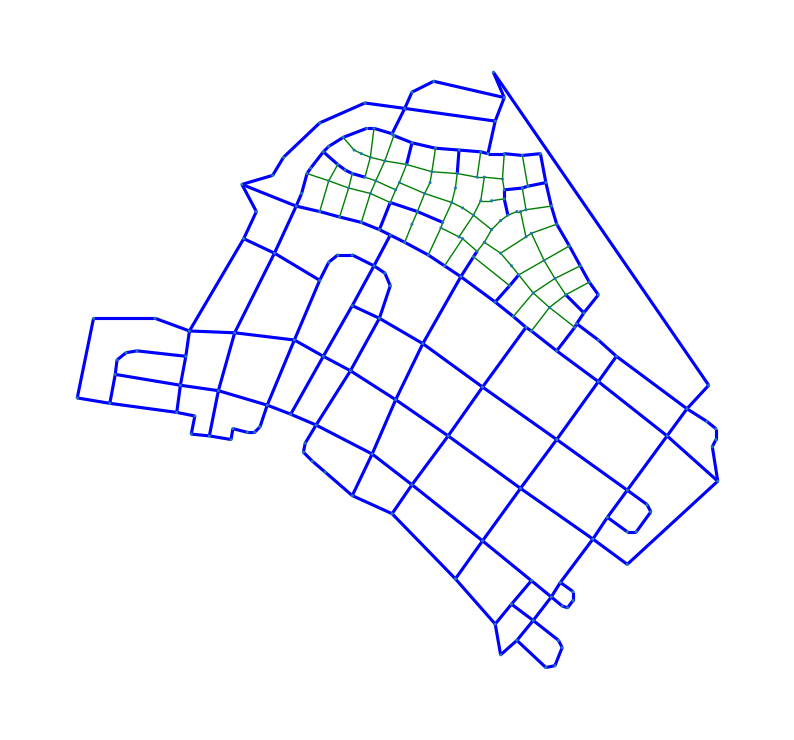

In [1]:
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 

sys.path.append("/Users/chenzebin/Documents/GitHub/road-planning-for-slums") 
    
import json
import numpy as np
import pretreatment.my_graph as mg
import pretreatment.my_graph_helpers as mgh
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import networkx as nx
import itertools
import operator

import copy
import inspect
import time

import DebugAndPreview as DP
########################################
## Main Code
########################################
###### Import
jsonPath = ("/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput/env1.json") 
#jsonPath = r"C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\JSONInput\env1.json"
myG,myNodeDict,myEdgeDict = mgh.GraphFromJSON_Customized(jsonPath,scaleTag=True,new_min = 0,new_max = 5)

###### Initialize info
myG.define_roads_FirstTime()                 # Road
myG.define_interior_parcels()                # Interior_Parcels

###### Compute
# Initial feature and property
myG.feature_init()
myG.td_dict_POI_Related_init()
###### Save this original state to mg
save_dir = "/Users/chenzebin/Documents/GitHub/road-planning-for-slums/data"
#save_dir = r"C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\data"
filename = "punggol"
DP.SaveGraph_mg(myG,save_dir,filename)

print (myG.f2POI_avg)


new_roads_i = mgh.build_all_roads(myG,
                                myG, # ??
                                alpha=2,
                                wholepath=True,
                                barriers=False,
                                road_max=1,
                                plot_intermediate=False,
                                strict_greedy=True,
                                vquiet=False,
                                outsidein=True
                                )
myG.plot_roads(parcel_labels=True)

myG.td_dict_POI_Related_init()
print (myG.f2POI_avg)


In [2]:

import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 

sys.path.append("/Users/chenzebin/Documents/GitHub/road-planning-for-slums") 
    
import os
import pickle

# Define the save directory and filename
#save_dir = r'C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\JSONInput'
save_dir = r'/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput'
filename = 'tempFile'  # replace with your actual filename

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the instance
with open(os.path.join(save_dir, '{}.mg'.format(filename)), 'wb') as mgfile:
    pickle.dump(myG, mgfile)



In [2]:
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 

sys.path.append("/Users/chenzebin/Documents/GitHub/road-planning-for-slums") 
    
    
import json
import numpy as np
import pretreatment.my_graph as mg
import pretreatment.my_graph_helpers as mgh
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import networkx as nx
import itertools
import operator

import copy
import inspect
import os
import pickle
# Define the save directory and filename
#file_path = r'C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\JSONInput\tempFile.mg'
file_path = '/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput/tempFile.mg'
# Read the data
with open(file_path, 'rb') as mgfile:
    myG = pickle.load(mgfile)

In [4]:
##################
###### Get Road balances
##################
total_road_steps = len(myG.myedges()) - len(myG.road_edges)
build_ration = 0.2
max_road_steps = len(myG.road_edges) + build_ration * total_road_steps

print ("max_road_steps",max_road_steps)

print (myG.face2POI_avg())
print (myG.f2POI_avg)
print (myG.f2POI_avg_min)


max_road_steps 226.8
1.4216780249781595
1.4216780249781595
1.0529360924060305
19


In [2]:
##################
###### F2F
##################
# PlotF2FDist(S0,vmin = 0,vmax = 5000)
# optNum = 5
# for i in range(optNum):  
#     bisecting_roads = mgh.bisecting_road(S0)
#     S0.plot_roads(parcel_labels=True)
#     S0.PlotF2FDist(vmin = 0,vmax = 5000)



In [4]:
import time

##################
###### POI
##################
S0 = copy.deepcopy(myG)

################ Loop by iteration ################
optNum = 1
time1 = time.time()
S0.td_dict_POI_Related_init() 
#S0.PlotF2POIDist()
time1 = time.time()
for i in range(optNum): 
    mgh.bisecting_road_forPOI(S0)
    S0.td_dict_POI_Related_init() 
    print (len(S0.road_edges))
    #S0.plot_roads(parcel_labels=True)
    #S0.PlotF2POIDist()
time2= time.time()

print ("comsumption",time2-time1)

time1 = time.time()
S0.td_dict_init()
time2 = time.time()
print ("comsumption",time2-time1)

################  Loop by road ration ################
# while len(S0.road_edges) < max_road_steps:
#     S0.td_dict_POI_Related_init() 
#     mgh.bisecting_road_forPOI(S0)
#     print (len(S0.road_edges))
#     S0.plot_roads(parcel_labels=True)
#     # S0.PlotF2POIDist()

td_init
212
comsumption 3.9819090366363525
td_init
comsumption 3.3205556869506836
